# **Basic Set up**

In [1]:
!pip install scikit-plot

In [10]:
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import scikitplot as skplt
import keras
import numpy as np

In [4]:
#load the models first

yaml_file = open('seq2seq_model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
seq2seq = keras.models.model_from_yaml(loaded_model_yaml)
# load weights into new model
seq2seq.load_weights("seq2seq_model.h5")
print("Loaded model from disk")


with open("seq2seq_trainHistoryDict.pkl",'rb') as f:
  seq2seq_history = pickle.load(f)
print(seq2seq_history)

Loaded model from disk
{'loss': [3.276305913925171, 1.7302254438400269, 1.628758430480957, 1.5203553438186646, 1.415922999382019, 1.3356186151504517, 1.2770413160324097, 1.2346956729888916, 1.2019869089126587, 1.1754231452941895], 'accuracy': [0.6384188532829285, 0.651537299156189, 0.6518397927284241, 0.6726012825965881, 0.698924720287323, 0.7174696922302246, 0.7264149188995361, 0.7335883975028992, 0.7391902208328247, 0.7440750002861023], 'val_loss': [1.8226109743118286, 1.6584910154342651, 1.5684010982513428, 1.4583220481872559, 1.3673025369644165, 1.300118088722229, 1.2532024383544922, 1.21628999710083, 1.1888002157211304, 1.1654655933380127], 'val_accuracy': [0.6553888916969299, 0.6553888916969299, 0.6574414372444153, 0.6875630617141724, 0.7129751443862915, 0.7255015969276428, 0.7329136729240417, 0.7383302450180054, 0.743467390537262, 0.7481997013092041]}


In [5]:
#load the models first

bin_yaml_file = open('binary_model.yaml', 'r')
bin_loaded_model_yaml = bin_yaml_file.read()
bin_yaml_file.close()
binary = keras.models.model_from_yaml(bin_loaded_model_yaml)
# load weights into new model
binary.load_weights("binary_model.h5")
print("Loaded model from disk")

with open("binary_trainHistoryDict.pkl",'rb') as f:
  binary_history = pickle.load(f)
print(binary_history)

Loaded model from disk
{'loss': [0.693581223487854, 0.6931062340736389, 0.6931126713752747, 0.6930977702140808, 0.6931005120277405, 0.6930995583534241, 0.6931062340736389, 0.6931098699569702, 0.6931055188179016, 0.6930994987487793], 'accuracy': [0.5040398240089417, 0.5053333044052124, 0.5053333044052124, 0.5053333044052124, 0.5053333044052124, 0.5053333044052124, 0.5053333044052124, 0.5053333044052124, 0.5053333044052124, 0.5053333044052124], 'val_loss': [0.6931003928184509, 0.6931057572364807, 0.6931002736091614, 0.6931053996086121, 0.6931002736091614, 0.6931016445159912, 0.69310063123703, 0.6931014657020569, 0.6931034922599792, 0.6931021213531494], 'val_accuracy': [0.5048443675041199, 0.5048443675041199, 0.5048443675041199, 0.5048443675041199, 0.5048443675041199, 0.5048443675041199, 0.5048443675041199, 0.5048443675041199, 0.5048443675041199, 0.5048443675041199]}


In [6]:
with open("y_pred.pkl",'rb') as pred:
  y_pred = pickle.load(pred)

with open("y_true.pkl",'rb') as true:
  y_true = pickle.load(true)

print(len(y_true))
print(len(y_pred))

10
10


In [7]:
EPOCHS = 10

# **Seq2Seq Plots**

1. Loss Plot
2. Acc Plot
3. Test Acc,Loss (already in the terminal output)

Text(0.5, 1.0, 'Loss for Seq2Seq')

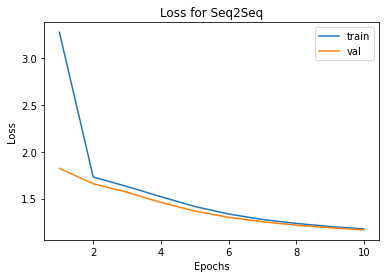

In [8]:
plt.plot(list(range(1,EPOCHS+1)),seq2seq_history['loss'],label='train')
plt.plot(list(range(1,EPOCHS+1)),seq2seq_history['val_loss'],label = 'val')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss for Seq2Seq")

Text(0.5, 1.0, 'Accuracy for Seq2Seq')

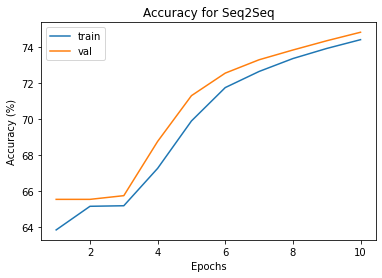

In [11]:
plt.plot(range(1,EPOCHS+1),np.array(seq2seq_history['accuracy'])*100.00,label='train')
plt.plot(range(1,EPOCHS+1),np.array(seq2seq_history['val_accuracy']) * 100.0,label = 'val')
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title("Accuracy for Seq2Seq")

# **Binary Model Plots**

1. Loss Plot
2. Acc Plot
3. ROC Plot
4. PR plot
5. F1 score report

In [14]:
from collections import Counter
print(dict(Counter(y_true)))

{0: 4, 1: 6}


In [15]:
y_pred

array([[0.5055585],
       [0.5055585],
       [0.5055585],
       [0.5055585],
       [0.5055585],
       [0.5055585],
       [0.5055585],
       [0.5055585],
       [0.5055585],
       [0.5055585]], dtype=float32)

Text(0.5, 1.0, 'Loss for Binary Classifier')

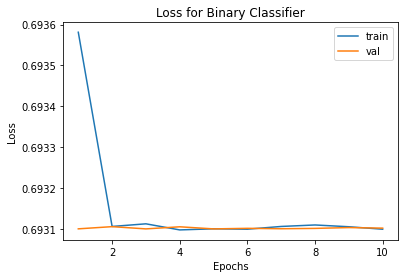

In [12]:
plt.plot(list(range(1,EPOCHS+1)), binary_history['loss'],label='train')
plt.plot(list(range(1,EPOCHS+1)),binary_history['val_loss'],label = 'val')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss for Binary Classifier")

Text(0.5, 1.0, 'Accuracy for Binary Classifier')

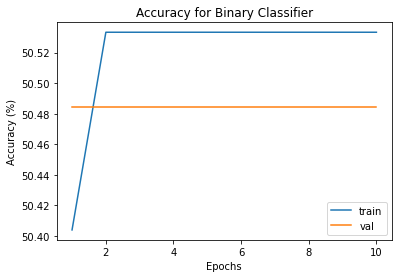

In [13]:
plt.plot(list(range(1,EPOCHS+1)), np.array(binary_history['accuracy'])*100.00,label='train')
plt.plot(list(range(1,EPOCHS+1)),np.array(binary_history['val_accuracy'])*100.00,label = 'val')
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title("Accuracy for Binary Classifier")

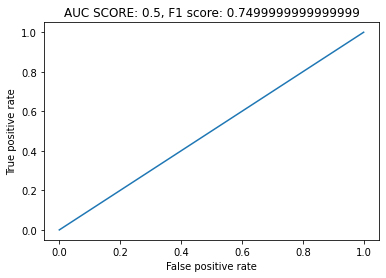

In [19]:
fpr, tpr, _ = roc_curve(y_true, y_pred)
auc_roc = roc_auc_score(y_true,y_pred) 
y_pred_f1 = y_pred > 0.5 #Basic threshold
f1 = f1_score(y_true,y_pred_f1)
plt.plot(fpr, tpr)
plt.title(f"AUC SCORE: {auc_roc}, F1 score: {f1}")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

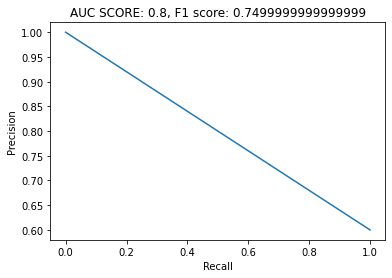

In [22]:
precision, recall, _ = precision_recall_curve(y_true, y_pred)
auc_roc = auc(recall,precision) 
y_pred_f1 = y_pred > 0.5 #Basic threshold
f1 = f1_score(y_true,y_pred_f1)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"AUC SCORE: {auc_roc}, F1 score: {f1}")
plt.show()

<Figure size 432x288 with 0 Axes>

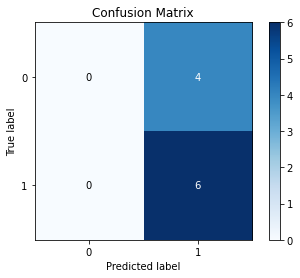

In [25]:
y_pred_f1 = y_pred > 0.5 #Basic threshold
plt.figure()
skplt.metrics.plot_confusion_matrix(y_true,y_pred_f1)
plt.show()